In [1]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
 
raw_train, raw_test = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[20%:]'],
    as_supervised=True
)

In [2]:
import numpy as np
import tensorflow as tf
 
def preprocess(image, label):
    out_image = tf.image.resize(image/255, [224, 224])
    return out_image, label
 
batch_size = 32
train_batch = raw_train.map(preprocess).batch(batch_size)
test_batch = raw_test.map(preprocess).batch(batch_size)

In [ ]:
!pip install tensorflow-hub

In [3]:
import tensorflow_hub as hub
 
url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
 
hub_model_transfer = tf.keras.Sequential([
    hub.KerasLayer(url, input_shape=(224, 224, 3), trainable=False),
    tf.keras.layers.Dense(1)
])

In [4]:
hub_model_transfer.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
hub_model_transfer.fit(train_batch, epochs=5)

Epoch 1/5
582/582 [==============================] - 40s 69ms/step - loss: 0.2972 - accuracy: 0.9643
Epoch 2/5
582/582 [==============================] - 40s 69ms/step - loss: 0.7852 - accuracy: 0.9336
Epoch 3/5
582/582 [==============================] - 40s 69ms/step - loss: 0.2506 - accuracy: 0.9787
Epoch 4/5
582/582 [==============================] - 40s 69ms/step - loss: 0.2281 - accuracy: 0.9819
Epoch 5/5
582/582 [==============================] - 41s 71ms/step - loss: 0.1967 - accuracy: 0.9844


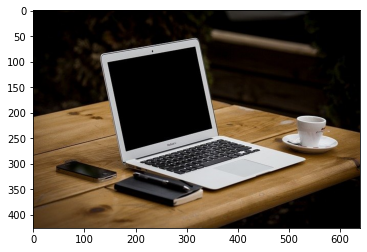

notebook


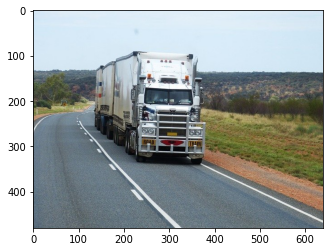

trailer truck


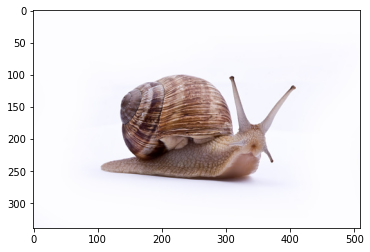

snail


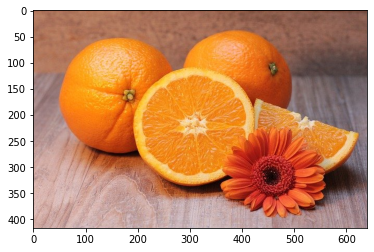

orange


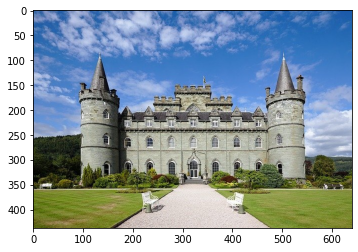

castle


In [11]:
from matplotlib import pyplot as plt
import numpy as np

for i in range(len(images)):
    plt.imshow(images[i])
    plt.show()
    topIdx = y_pred_top[i]
    print(f'{labels[topIdx]}')



In [1]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

(raw_train, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[20%:]'],
    with_info=True,
    as_supervised=True,
)

In [2]:
import numpy as np
import tensorflow as tf

def preprocess(image, label):
    out_image = tf.image.resize(image/255, [224, 224])
    out_image = tf.keras.applications.mobilenet_v2.preprocess_input(out_image)

    return out_image, label

batch_size = 32
train_batch = raw_train.map(preprocess).batch(batch_size)
test_batch = raw_test.map(preprocess).batch(batch_size)

In [5]:
import tensorflow_hub as hub

url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"

hub_model_transfer = tf.keras.Sequential([
    hub.KerasLayer(url, input_shape=(224, 224, 3), trainable=False),
    tf.keras.layers.Dense(1)
])

hub_model_transfer.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hub_model_transfer.fit(train_batch, epochs=5)


Epoch 1/5
582/582 [==============================] - 20s 35ms/step - loss: 0.2982 - accuracy: 0.9664
Epoch 2/5
582/582 [==============================] - 20s 34ms/step - loss: 0.2264 - accuracy: 0.9774
Epoch 3/5
582/582 [==============================] - 20s 34ms/step - loss: 0.1884 - accuracy: 0.9819
Epoch 4/5
582/582 [==============================] - 20s 34ms/step - loss: 0.4118 - accuracy: 0.9660
Epoch 5/5
582/582 [==============================] - 20s 34ms/step - loss: 0.2353 - accuracy: 0.9794


In [6]:
hub_model_transfer.evaluate(test_batch, verbose=2)

582/582 - 39s - loss: 0.2250 - accuracy: 0.9819


[0.2249893993139267, 0.9818914532661438]